# Data Visualization and Exploration

We look at the various questions such as:
1. The Most successful movies at the Academy
2. The Biggest Surprises
3. The Biggest Dissapointments
4. The Best Movies based on aggregated information from IMDB and Academy Awards

Still to come...
1. Best comedies
2. Best romance
3. Best action

 

In [1]:
# import necessary libraries
import pandas as pd
import collections
import numpy as np
import requests
import wikipedia
import re
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from urllib.request import urlopen
from scrapy import selector
import datetime as dt
import pickle
from skimage import io
from IPython.display import clear_output
%matplotlib inline
plt.style.use('ggplot')

# Data Visualization: The Academy Awards

In [2]:
#OSCARS information
genre_dict = pickle.load(open("my_data_4/genre_dict","rb"))
genre_dict2 = pickle.load(open("my_data_4/genre_dict2","rb"))


all_categories = pickle.load(open("my_data_4/all_categories","rb")) 
major_categories = pickle.load(open("my_data_4/major_categories","rb")) 
minor_categories = pickle.load(open("my_data_4/minor_categories","rb")) 

df_oscars_wide = pd.read_csv('my_data_4/df_oscars_wide.csv', index_col=[0])
df_oscars_long = pd.read_csv('my_data_4/df_oscars_long.csv', index_col=[0])
df_individual_long = pd.read_csv('my_data_4/df_individual_long.csv', index_col=[0])
df_oscars_wide.rename(columns = {'film':'title'},inplace=True)
df_oscars_wide.title = df_oscars_wide.title.str.replace(':','')

# Movies information
df_movies = pd.read_csv('my_data_4/df_movies.csv', index_col=[0])
df_movies_derived = pd.read_csv('my_data_4/df_movies_derived.csv', index_col=[0])
df_movies_genres = pd.read_csv('my_data_4/df_movies_genres.csv', index_col=[0])

#Oscar scores and counts
df_movies_oscars_pre_post_score = pd.read_csv('my_data_4/df_movies_oscars_pre_post_score.csv', index_col=[0])
df_movies_oscars_precount = pd.read_csv('my_data_4/df_movies_oscars_precount.csv', index_col=[0])
df_movies_oscars_postcount = pd.read_csv('my_data_4/df_movies_oscars_postcount.csv', index_col=[0])
df_movies.title = df_movies.title.str.replace(':','')

movie_dict = pickle.load(open("my_data_4/movie_dict","rb"))

# The most popular genres for the Best Picture Award

Text(0, 0.5, 'Genres')

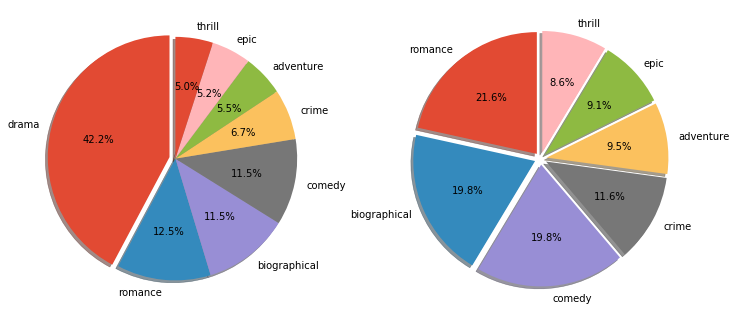

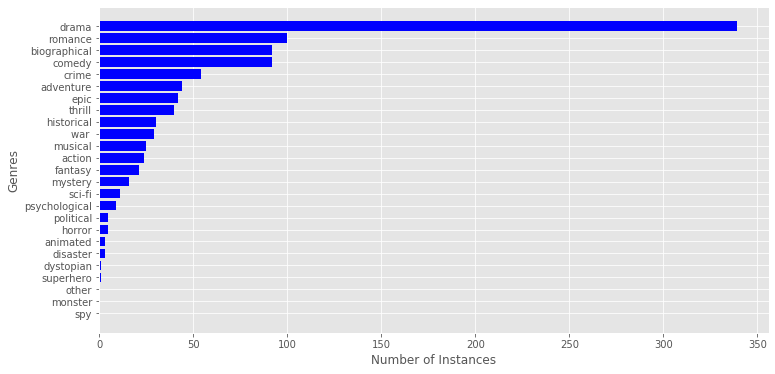

In [3]:
df = df_oscars_long
df = df[(df.category == 'picture')&(df.result != 'O')]
_genres = []
for genre in genre_dict:
    gen = genre_dict[genre]
    if gen not in _genres:
        _genres.append(gen)
_genres.append('other')
# print(_genres)
_genres_count = np.zeros(len(_genres))

for row in df.iterrows():
    idx = row[0]
    title = row[1].title
    year = row[1].year
    if (title,year) not in movie_dict:
        continue
    if 'genre' not in movie_dict[title,year]:
        continue
    all_genres = movie_dict[title,year]['genre']
    for genre in all_genres:
        
        if genre == 'other' or genre == 'oth':
            continue
        _genres_count[_genres.index(genre)]+=1


# df_gen_count = pd.DataFrame({'genres': _genres, 'nums': _genres_count})
df_gen_count = pd.DataFrame({'genres':_genres, "nums":_genres_count}).sort_values(by = 'nums', ascending=True)
df_gen_count['genres'] = df_gen_count['genres'].apply(lambda x:genre_dict2[x])

N = 8
df = df_gen_count.sort_values(by = 'nums', ascending=False)
df = df.iloc[range(N),:]
explode = np.zeros(len(df))
explode[0] = 0.05
plt.figure(figsize=(12,6))
ax1=plt.subplot(1, 2, 1)
_ = plt.pie(df['nums'], labels = df['genres'],explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)

df = df.iloc[range(1,N),:]
explode = np.ones(len(df))*0.05
ax2=plt.subplot(1, 2, 2)
_ = plt.pie(df['nums'], labels = df['genres'],explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)
     
plt.figure(figsize=(12,6))
_ = plt.barh(df_gen_count['genres'], df_gen_count['nums'], color ='b')
plt.xlabel('Number of Instances')
plt.ylabel('Genres')

# The List of Winners and Losers

1. The most successful movies at the Academy of all time
2. The biggest surprises of all time - the underdog winners
3. The biggest dissapointments
4. The best films according to Academy and IMDB
5. When the Academy disagreed with the public


In [4]:
10 - np.arange(10)

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [5]:
def plot_n_sort(df, size_factor = 3, fontsize=14, figsize = (10,10)):
    x = df.sort_values(by = 'result', ascending=False).head(10)
    x = x.merge(df_movies[['title','year','box_office_adjusted']], on=['title','year'],how='left')
    x.reset_index(inplace=True, drop=True)
    x = x.iloc[::-1]
    rank_str = [str(z) for z in len(x) - np.arange(len(x))]
    plt.figure(figsize=figsize)
    plt.scatter(x.result, range(len(x)),  s = size_factor*x.box_office_adjusted, c ='b', alpha = 0.6)
    plt.xlabel('SCORE', fontsize = fontsize)
    plt.ylabel('RANK', fontsize = fontsize)
    plt.xlim([50,250])
    
    plt.yticks(range(len(rank_str)), rank_str, fontsize = fontsize)
    for i,(z1,z2) in enumerate(zip(x.result, x.title)):
        plt.annotate(z2, xy=(z1,i), xytext=(z1+10, i), fontsize = 15) #  arrowprops={'color':'red'})
    return x

### The Most Successful Academy  Awards Since 1960s

In [6]:
df = df_movies_oscars_pre_post_score
df = df[df.year>=1960]
print(df.shape)
df.sort_values(by='postscore', ascending=False).head(10)

(4770, 5)


,imdbID,title,year,prescore,postscore
873,tt0073486,one flew over the cuckoo's nest,1975,0.6,25.20
1262,tt0079417,kramer vs. kramer,1979,1.0,24.20
479,tt0102926,the silence of the lambs,1991,5.2,24.00
1246,tt0086425,terms of endearment,1983,6.8,23.00
267,tt1504320,the king's speech,2010,5.6,20.45
454,tt0138097,shakespeare in love,1998,5.0,20.40
2698,tt0060665,a man for all seasons,1966,11.6,20.40
618,tt0405159,million dollar baby,2004,20.8,20.30
4714,tt0067116,the french connection,1971,0.2,20.25
131,tt0109830,forrest gump,1994,8.3,20.20


### Biggest Surprises

In [7]:
df = df_movies_oscars_pre_post_score
print(df.shape)
df['oscar_surprise'] = df.postscore - df.prescore
df.sort_values(by='oscar_surprise', ascending=False).head(10)

(4770, 5)


,imdbID,title,year,prescore,postscore,oscar_surprise
873,tt0073486,one flew over the cuckoo's nest,1975,0.6,25.20,24.60
1262,tt0079417,kramer vs. kramer,1979,1.0,24.20,23.20
4714,tt0067116,the french connection,1971,0.2,20.25,20.05
479,tt0102926,the silence of the lambs,1991,5.2,24.00,18.80
2187,tt0055614,west side story,1961,0.6,19.20,18.60
398,tt0268978,a beautiful mind,2001,1.0,19.20,18.20
1246,tt0086425,terms of endearment,1983,6.8,23.00,16.20
750,tt0099348,dances with wolves,1990,0.2,15.60,15.40
454,tt0138097,shakespeare in love,1998,5.0,20.40,15.40
4696,tt1655442,the artist,2011,0.0,15.35,15.35


### The Biggest Dissapointments

In [8]:
df = df_movies_oscars_pre_post_score
print(df.shape)
df['oscar_surprise'] = df.postscore - df.prescore
df.sort_values(by='oscar_surprise', ascending=True).query("postscore < 1").head(10)

(4770, 6)


,imdbID,title,year,prescore,postscore,oscar_surprise
775,tt6294822,the post,2017,45.747222,0.311111,-45.436111
3563,tt0097965,new york stories,1989,38.290909,0.000000,-38.290909
2920,tt0112883,don juan demarco,1994,37.900000,0.000000,-37.900000
4746,tt0112883,don juan demarco,1995,37.900000,0.000000,-37.900000
2640,tt0075648,airport '77,1977,37.600000,0.000000,-37.600000
2050,tt1341188,how do you know,2010,37.500000,0.000000,-37.500000
2842,tt0875034,nine,2009,37.700000,0.250000,-37.450000
4368,tt0074777,the last tycoon,1976,37.200000,0.000000,-37.200000
1708,tt0418689,flags of our fathers,2006,37.100000,0.000000,-37.100000
1307,tt0343737,the good shepherd,2006,36.900000,0.000000,-36.900000


## Best in the various Genres

### Best Comedies

In [9]:
df = pd.read_csv('my_data_4/DF_MEGA.csv')

,title,year,postscore,imdb_rating,result,box_office_adjusted
9,my fair lady,1964,14.60,7.8,113.880,234.516129
8,driving miss daisy,1989,15.40,7.4,113.960,117.580645
7,birdman or (the unexpected virtue of ignorance),2014,15.60,7.7,120.120,43.592863
6,the artist,2011,15.35,7.9,121.265,59.304967
5,green book,2018,15.20,8.2,124.640,128.829543


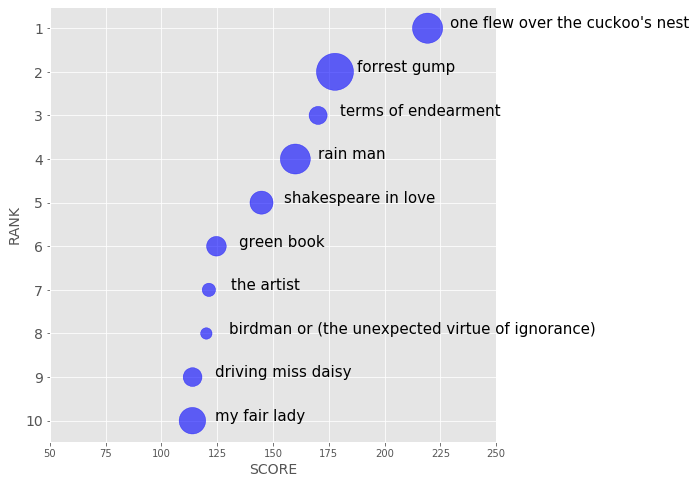

In [10]:
df2 = df[df.com == 1]
df2 = df2[df2.year>=1960]
df2 = df2[['title','year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(10)
x = plot_n_sort(df2, size_factor = 3, fontsize=14, figsize = (8,8))
x.head()


### Best Romance

,title,year,postscore,imdb_rating,result,box_office_adjusted
9,out of africa,1985,15.4,7.2,110.88,211.431227
8,annie hall,1977,14.2,8.0,113.60,63.201320
7,the english patient,1996,15.5,7.4,114.70,147.864882
6,coming home,1978,15.8,7.3,115.34,55.214724
5,the piano,1993,15.4,7.6,117.04,96.885813


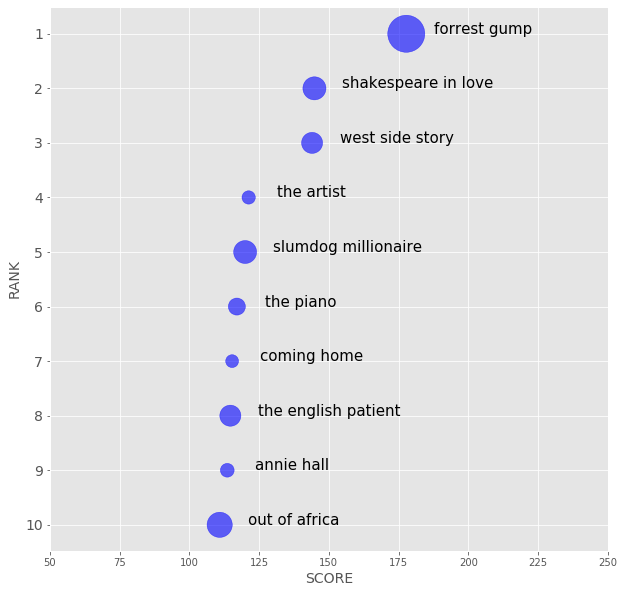

In [11]:
df = pd.read_csv('my_data_4/DF_MEGA.csv')
df2 = df[df.rom == 1]
df2 = df2[df2.year>=1960]
df2 = df2[['title', 'year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(10)
x = plot_n_sort(df2, size_factor = 3, fontsize=14, figsize = (10,10))
x.head()



### Best Biographical Films

,title,year,postscore,imdb_rating,result,box_office_adjusted
9,patton,1970,15.0,7.9,118.50,159.278351
8,green book,2018,15.2,8.2,124.64,128.829543
7,12 years a slave,2013,15.6,8.1,126.36,80.572810
6,the pianist,2002,15.2,8.5,129.20,66.759311
5,schindler's list,1993,15.4,8.9,137.06,222.906574


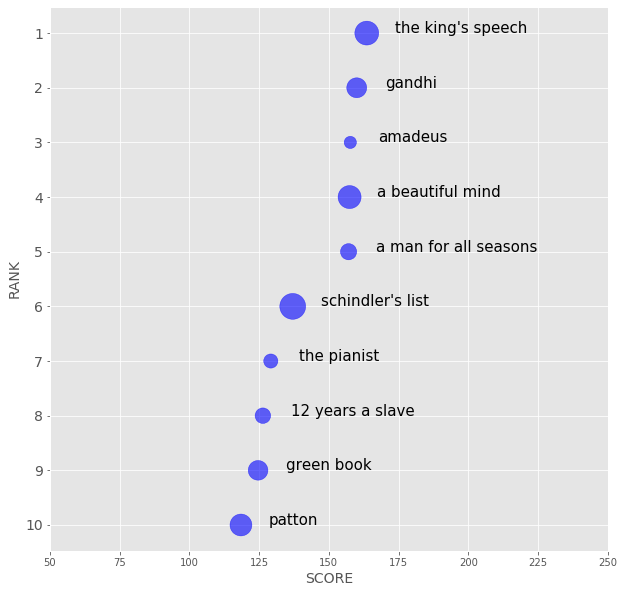

In [12]:
df2 = df[(df.bio == 1)]
df2 = df2[df2.year>=1960]
df2 = df2[['title','year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(10)
x = plot_n_sort(df2, size_factor = 3, fontsize=14, figsize = (10,10))
x.head()


In [13]:
df.columns

Index(['Unnamed: 0', 'imdbID', 'title', 'year', 'n_votes', 'imdb_rating',
       'budget', 'box_office', 'cast', 'genre', 'running_time',
       'inflation_factor', 'budget_adjusted', 'budget_per_actor',
       'budget_per_time', 'runtime_per_actor', 'percent_revenue',
       'total_ratings', 'book', 'sup', 'hor', 'com', 'spy', 'his', 'war',
       'psy', 'rom', 'mon', 'fan', 'mus', 'pol', 'bio', 'sci', 'act', 'dra',
       'dis', 'adv', 'mys', 'thr', 'dys', 'cri', 'epi', 'oth', 'ani',
       'based_on_book', 'other', 'prescore', 'postscore', 'precount_wins',
       'precount_noms', 'win', 'nom', 'none'],
      dtype='object')

### Best Crime Dramas

,title,year,postscore,imdb_rating,result,box_office_adjusted
9,to kill a mockingbird,1962,10.600000,8.3,87.980000,43.377483
8,traffic,2000,15.200000,7.6,115.520000,120.963995
7,in the heat of the night,1967,15.200000,8.0,121.600000,72.754491
6,the departed,2006,15.200000,8.5,129.200000,144.593254
5,the godfather,1972,14.533333,9.2,133.706667,684.210526


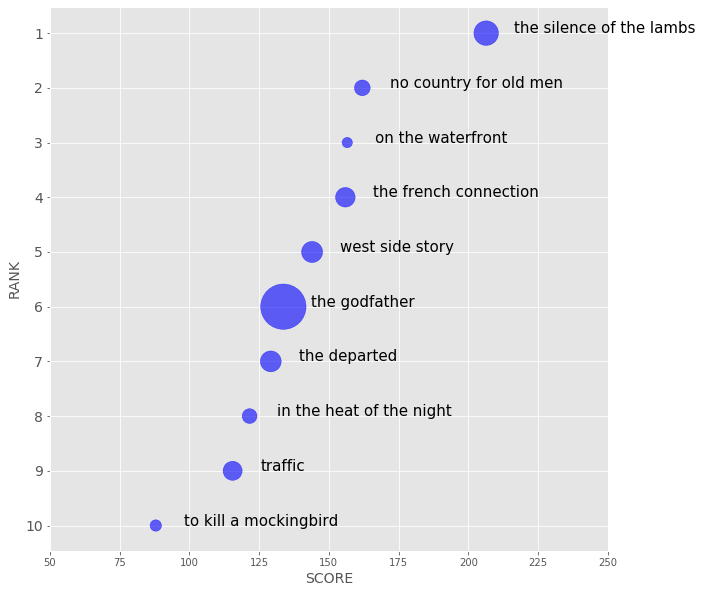

In [14]:
df2 = df[(df.cri == 1)]
df2 = df2[['title', 'year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(10)
x = plot_n_sort(df2, size_factor = 3, fontsize=14, figsize = (10,10))
x.head()

### Best Adventures Films

,title,year,postscore,imdb_rating,result,box_office_adjusted
9,spartacus,1960,5.000,8.5,42.500,202.702703
8,the african queen,1951,5.600,7.8,43.680,41.346154
7,inglourious basterds,2009,5.400,8.3,44.820,149.857600
6,the shape of water,2017,10.750,7.3,78.475,79.634465
5,the revenant,2015,10.325,8.0,82.600,224.878384


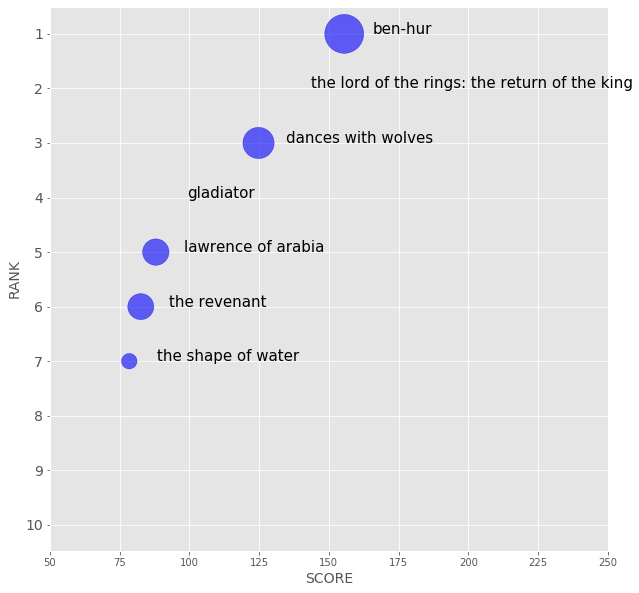

In [15]:
df = pd.read_csv('my_data_4/DF_MEGA.csv')
df2 = df[(df.adv == 1)]
df2 = df2[['title', 'year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(10)
x = plot_n_sort(df2, size_factor = 3, fontsize=14, figsize = (10,10))
x.head()

### Best Epic Films

,title,year,postscore,imdb_rating,result,box_office_adjusted
9,gladiator,1992,10.5,8.5,89.25,NaN
8,out of africa,1985,15.4,7.2,110.88,211.431227
7,the last emperor,1987,15.0,7.7,115.50,38.732394
6,patton,1970,15.0,7.9,118.50,159.278351
5,dances with wolves,1990,15.6,8.0,124.80,324.560061


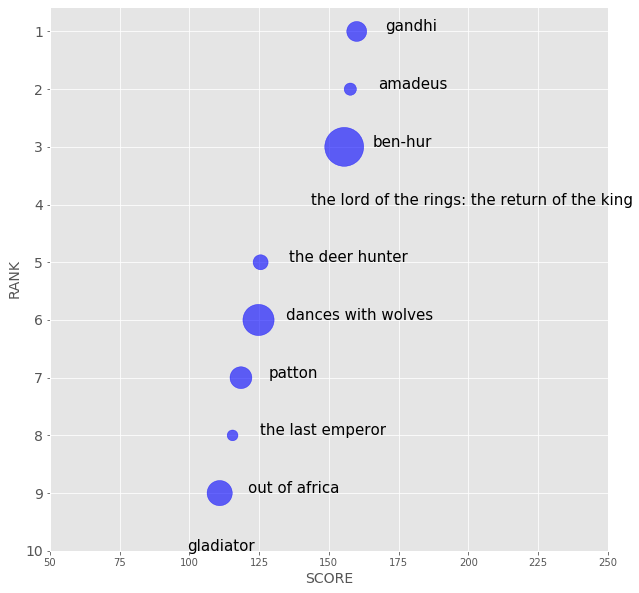

In [16]:
df = pd.read_csv('my_data_4/DF_MEGA.csv')
df2 = df[(df.epi == 1)]
df2 = df2[['title','year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(10)
x = plot_n_sort(df2, size_factor = 3, fontsize=14, figsize = (10,10))
x.head()


### Best biographical films

,title,year,postscore,imdb_rating,result,box_office_adjusted
9,patton,1970,15.0,7.9,118.50,159.278351
8,green book,2018,15.2,8.2,124.64,128.829543
7,12 years a slave,2013,15.6,8.1,126.36,80.572810
6,the pianist,2002,15.2,8.5,129.20,66.759311
5,schindler's list,1993,15.4,8.9,137.06,222.906574


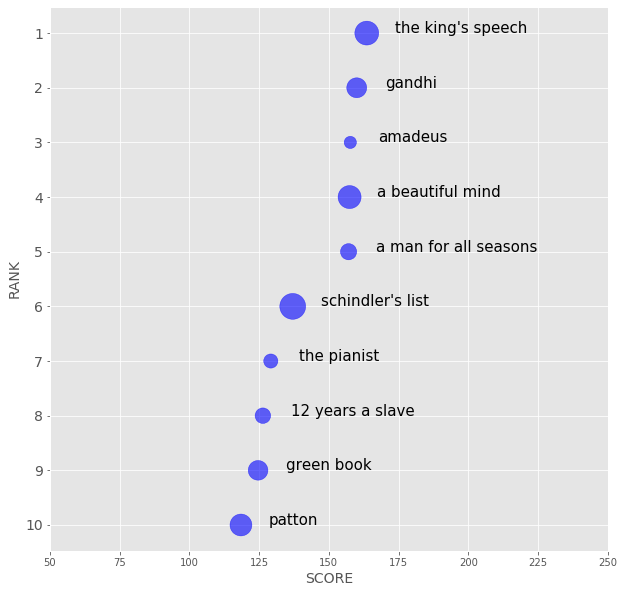

In [17]:
df2 = df[(df.bio == 1)]
df2 = df2[['title', 'year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(10)
x = plot_n_sort(df2, size_factor = 3, fontsize=14, figsize = (10,10))
x.head()


### Best Historical Films

,title,year,postscore,imdb_rating,result,box_office_adjusted
9,the shape of water,2017,10.75,7.3,78.475,79.634465
8,argo,2012,10.20,7.7,78.540,101.178602
7,reds,1981,10.90,7.3,79.570,44.444444
6,lawrence of arabia,1962,10.60,8.3,87.980,231.788079
5,gladiator,1992,10.50,8.5,89.250,NaN


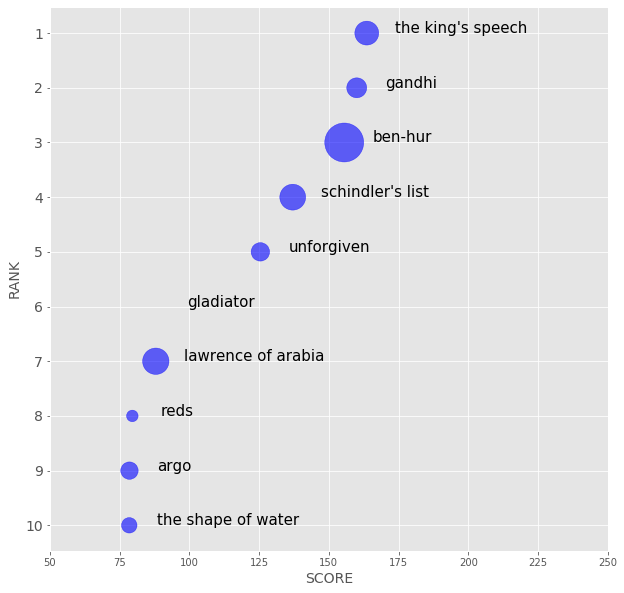

In [18]:
df2 = df[(df.his == 1)]
df2 = df2[['title', 'year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(10)
x = plot_n_sort(df2, size_factor = 3, fontsize=14, figsize = (10,10))
x.head()

### The Best Film of all times

,imdbID,title,year,postscore,imdb_rating,result,box_office_adjusted
9,tt0407887,the departed,2006,15.200000,8.5,129.200000,144.593254
8,tt0253474,the pianist,2002,15.200000,8.5,129.200000,66.759311
7,tt0068646,the godfather,1972,14.533333,9.2,133.706667,684.210526
6,tt0108052,schindler's list,1993,15.400000,8.9,137.060000,222.906574
5,tt0086879,amadeus,1984,19.000000,8.3,157.700000,50.048123
4,tt0071562,the godfather part ii,1974,18.400000,9.0,165.600000,178.498986
3,tt0169547,american beauty,1999,20.200000,8.3,167.660000,213.865546
2,tt0109830,forrest gump,1994,20.200000,8.8,177.760000,457.624831
1,tt0102926,the silence of the lambs,1991,24.000000,8.6,206.400000,200.220264
0,tt0073486,one flew over the cuckoo's nest,1975,25.200000,8.7,219.240000,303.438662


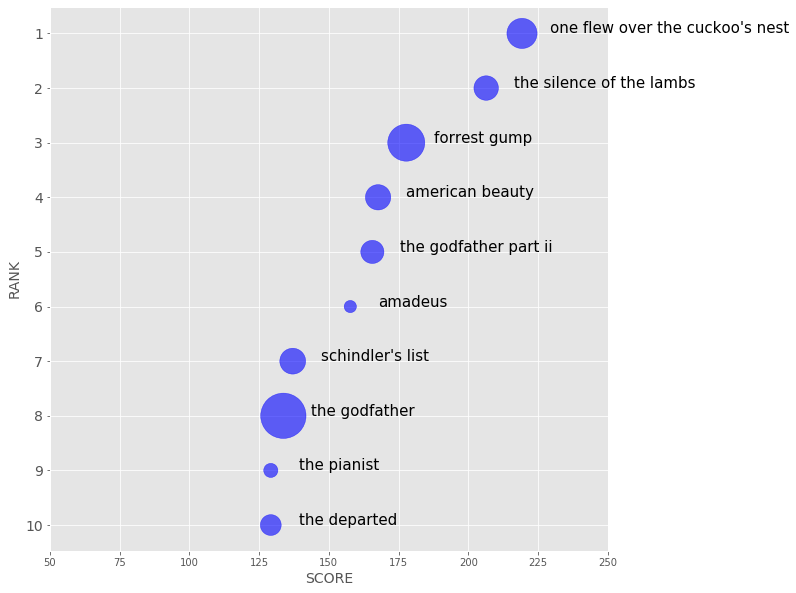

In [19]:
df = pd.merge(df_movies_oscars_pre_post_score, df_movies)
df1 = df.sort_values(by="imdb_rating", ascending=False)
df1.head()

df2 = df.sort_values(by="postscore", ascending=False)
df2.head()
N = 2000
df3 = pd.merge(df1.head(N),df2.head(N)).query("postscore > 12")
df3['result'] = df3.postscore*df3.imdb_rating
df2 = df3[['imdbID','title','year','postscore', 'imdb_rating','result']].head(10).sort_values(by='result', ascending=False)
x = plot_n_sort(df2, size_factor = 3, fontsize=14, figsize = (10,10))
x.head(10)


### Conditional Probability of Genres

What is the probability a movie is a comedy given that it is a drama

In [20]:
def conditional_prob(prob_of, given, data):
    """prob_of{'comedy':1, 'romance':0} given{'dra':1} will return 
    probability of comedy but not romance given that it is a drama
    """
    for key,value in given.items():
        data = data[data[key] == value]
    L1 = len(data)
    for key,value in prob_of.items():
        data = data[data[key] == value]
    return len(data)/L1
    
    # return len(data[data[prob_of.key()] == prob_of.value()])/len(data)

In [21]:
### BAYE's theorem on Genre

df_movies_genres = pd.read_csv('my_data_4/df_movies_genres.csv')
df_movies_genres.head()

prob_of = {'com':1}
given = {'dra':1}
p_com_given_dra = conditional_prob(prob_of, given, df_movies_genres)
print('p_comedy_given_drama:',p_com_given_dra)

prob_of = {'com':1}
given = {}
p_com = conditional_prob(prob_of, given, df_movies_genres)
print('p_comedy:', p_com)

prob_of = {'dra':1}
given = {}
p_dra = conditional_prob(prob_of, given, df_movies_genres)
print('p_drama:', p_dra)

prob_of = {'com':1, 'dra':1}
given = {}
p_com_and_dra = conditional_prob(prob_of, given, df_movies_genres)
print('p_comedy_and_drama:',p_com_and_dra)

print(p_com_and_dra/p_dra)
print('=?')
print(p_com_given_dra)


prob_of = {'dra':1}
given = {'com':1}
p_dra_given_com = p_com_and_dra/p_com
print('\np_dra_given_com')
print(conditional_prob(prob_of, given, df_movies_genres))
print(p_dra_given_com)

print('\nProb of drama given comedy is bigger because drama is a much bigger set')


p_comedy_given_drama: 0.28553871364195005
p_comedy: 0.38596863077575244
p_drama: 0.5173802458668928
p_comedy_and_drama: 0.14773208986858838
0.28553871364195
=?
0.28553871364195005

p_dra_given_com
0.3827567270730368
0.38275672707303676

Prob of drama given comedy is bigger because drama is a much bigger set
